# Q.1 Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv('50_Startups.csv')

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data1 = data.rename({'R&D Spend':'RDS','Marketing Spend':'MKTS'},axis=1)

In [6]:
data1

,RDS,Administration,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
data1.isna().sum()

RDS               0
Administration    0
MKTS              0
State             0
Profit            0
dtype: int64

In [8]:
data1.corr()

,RDS,Administration,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


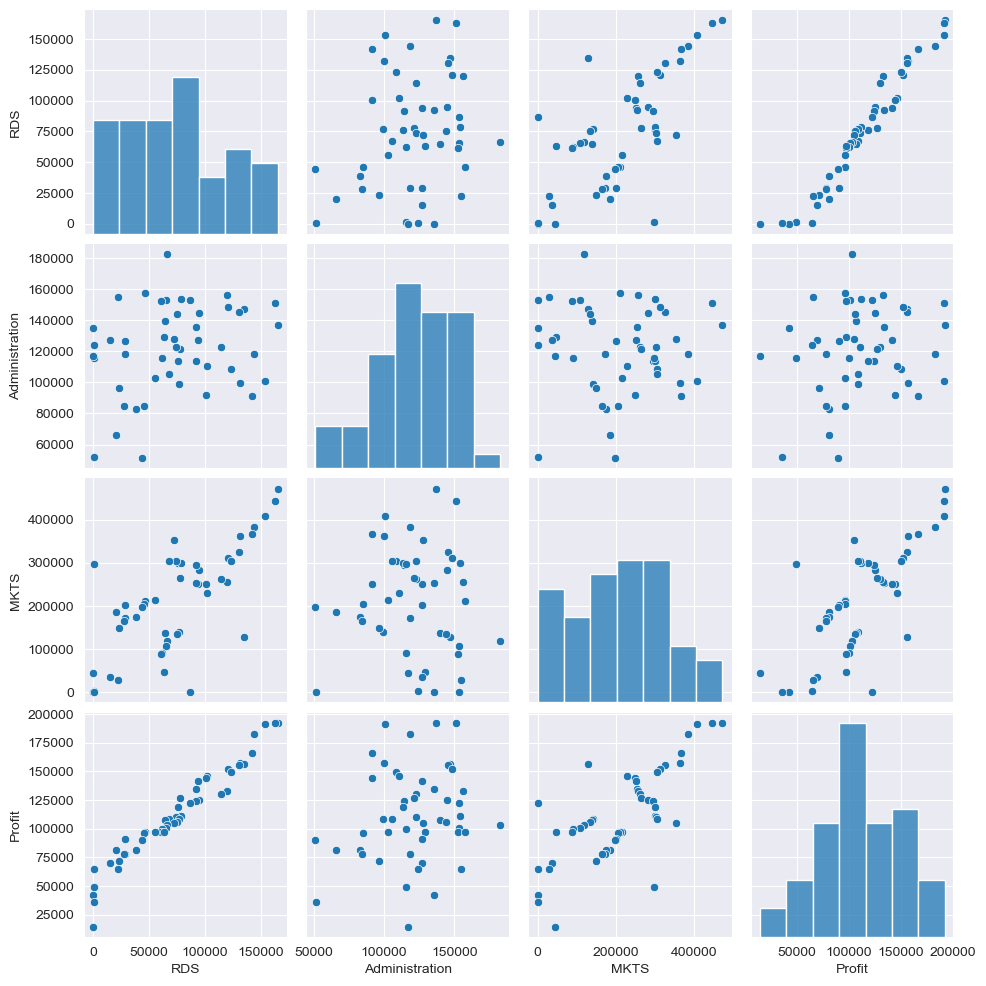

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [10]:
model = smf.ols('Profit~RDS + Administration + MKTS', data=data1).fit()

In [11]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MKTS                  0.027228
dtype: float64

In [12]:
print(' t-values:','\n',model.tvalues, '\n','*** p-vaues ***','\n', model.pvalues)

 t-values: 
 Intercept          7.626218
RDS               17.846374
Administration    -0.525507
MKTS               1.655077
dtype: float64 
 *** p-vaues *** 
 Intercept         1.057379e-09
RDS               2.634968e-22
Administration    6.017551e-01
MKTS              1.047168e-01
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
ml_a = smf.ols('Profit~Administration',data=data1).fit()
ml_a.tvalues, ml_a.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [15]:
ml_m = smf.ols('Profit~MKTS',data=data1).fit()
ml_m.tvalues, ml_m.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [16]:
mlr_am = smf.ols('Profit~Administration+MKTS',data=data1).fit()
mlr_am.tvalues, mlr_am.pvalues

(Intercept         1.142741
 Administration    2.467779
 MKTS              8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 MKTS              9.727245e-11
 dtype: float64)

In [17]:
rsq_r=smf.ols("RDS~Administration+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+Administration",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

d1={'Variables':['RDS','Administration','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,Administration,1.175091
2,MKTS,2.326773


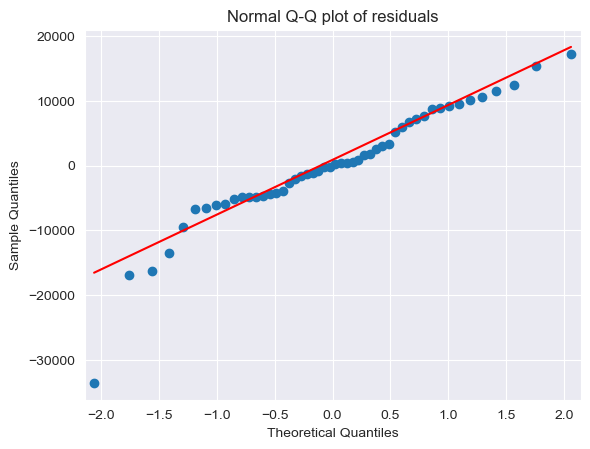

In [18]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [20]:
def standard_values(vals) : return (vals-vals.mean())/vals.std() 

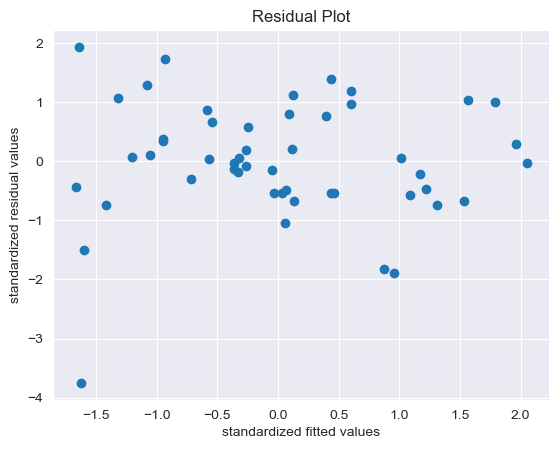

In [21]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [22]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

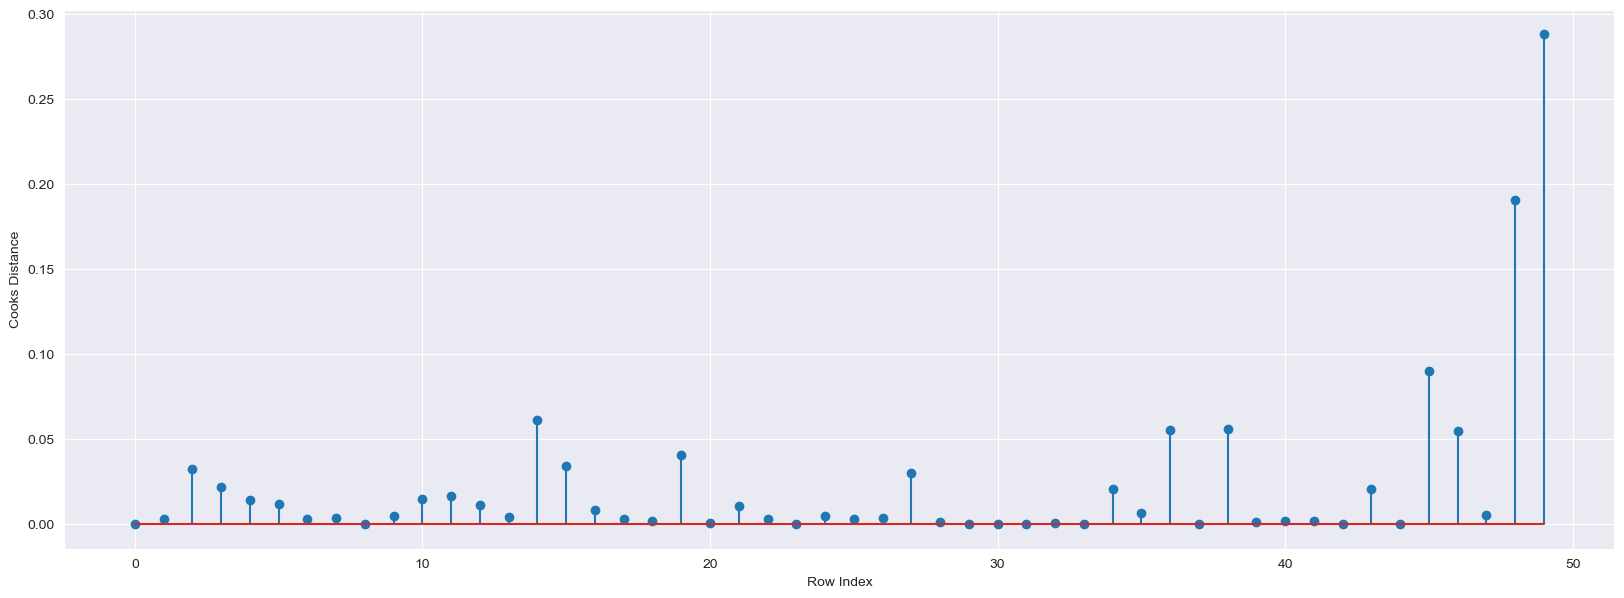

In [23]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543267)

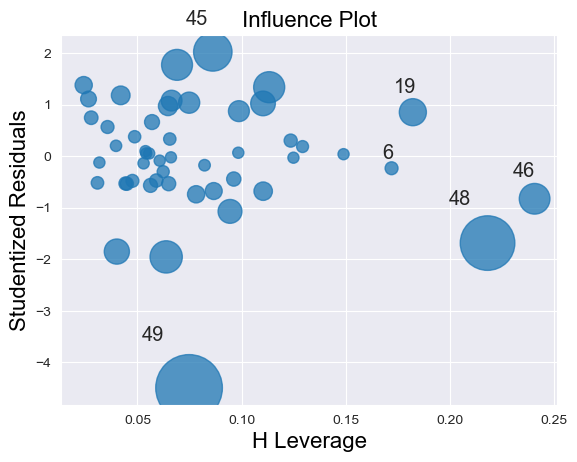

In [25]:
influence_plot(model)
plt.show()

In [26]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [27]:
data1[data1.index.isin([49])] 

,RDS,Administration,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [28]:
data2 = data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,Administration,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [29]:
model2 = smf.ols("Profit~RDS+Administration+MKTS",data=data2).fit()

In [30]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+Administration+MKTS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~RDS+Administration+MKTS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918795
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [31]:
final_model.rsquared 

0.9882757054424702

In [32]:
data2

,RDS,Administration,MKTS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


In [33]:
new_data=pd.DataFrame({'RDS':70000,"Administration":90000,"MKTS":140000},index=[0])
new_data

,RDS,Administration,MKTS
0,70000,90000,140000


In [34]:
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [35]:
pred_y=final_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [36]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


# Q.2 Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [38]:
toyota = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [39]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [40]:
toyota1 = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [41]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [42]:
toyota1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [43]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

In [44]:
toyota_model = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight" , data = toyota1).fit()

In [45]:
toyota_model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [46]:
print("T-Values : " ,"\n", toyota_model.tvalues ,"\n","\n", "P-Values : " , "\n" , toyota_model.pvalues )

T-Values :  
 Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 
 P-Values :  
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [47]:
(toyota_model.rsquared , toyota_model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [48]:
toyota_cc = smf.ols("Price ~ cc", data  = toyota1).fit()
print(toyota_cc.pvalues)

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [49]:
toyota_door = smf.ols("Price ~ Doors", data  = toyota1).fit()
print(toyota_door.pvalues)

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [50]:
toyota_cc_door = smf.ols("Price ~ cc + Doors" , data = toyota1).fit()

print(toyota_cc_door.pvalues)

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


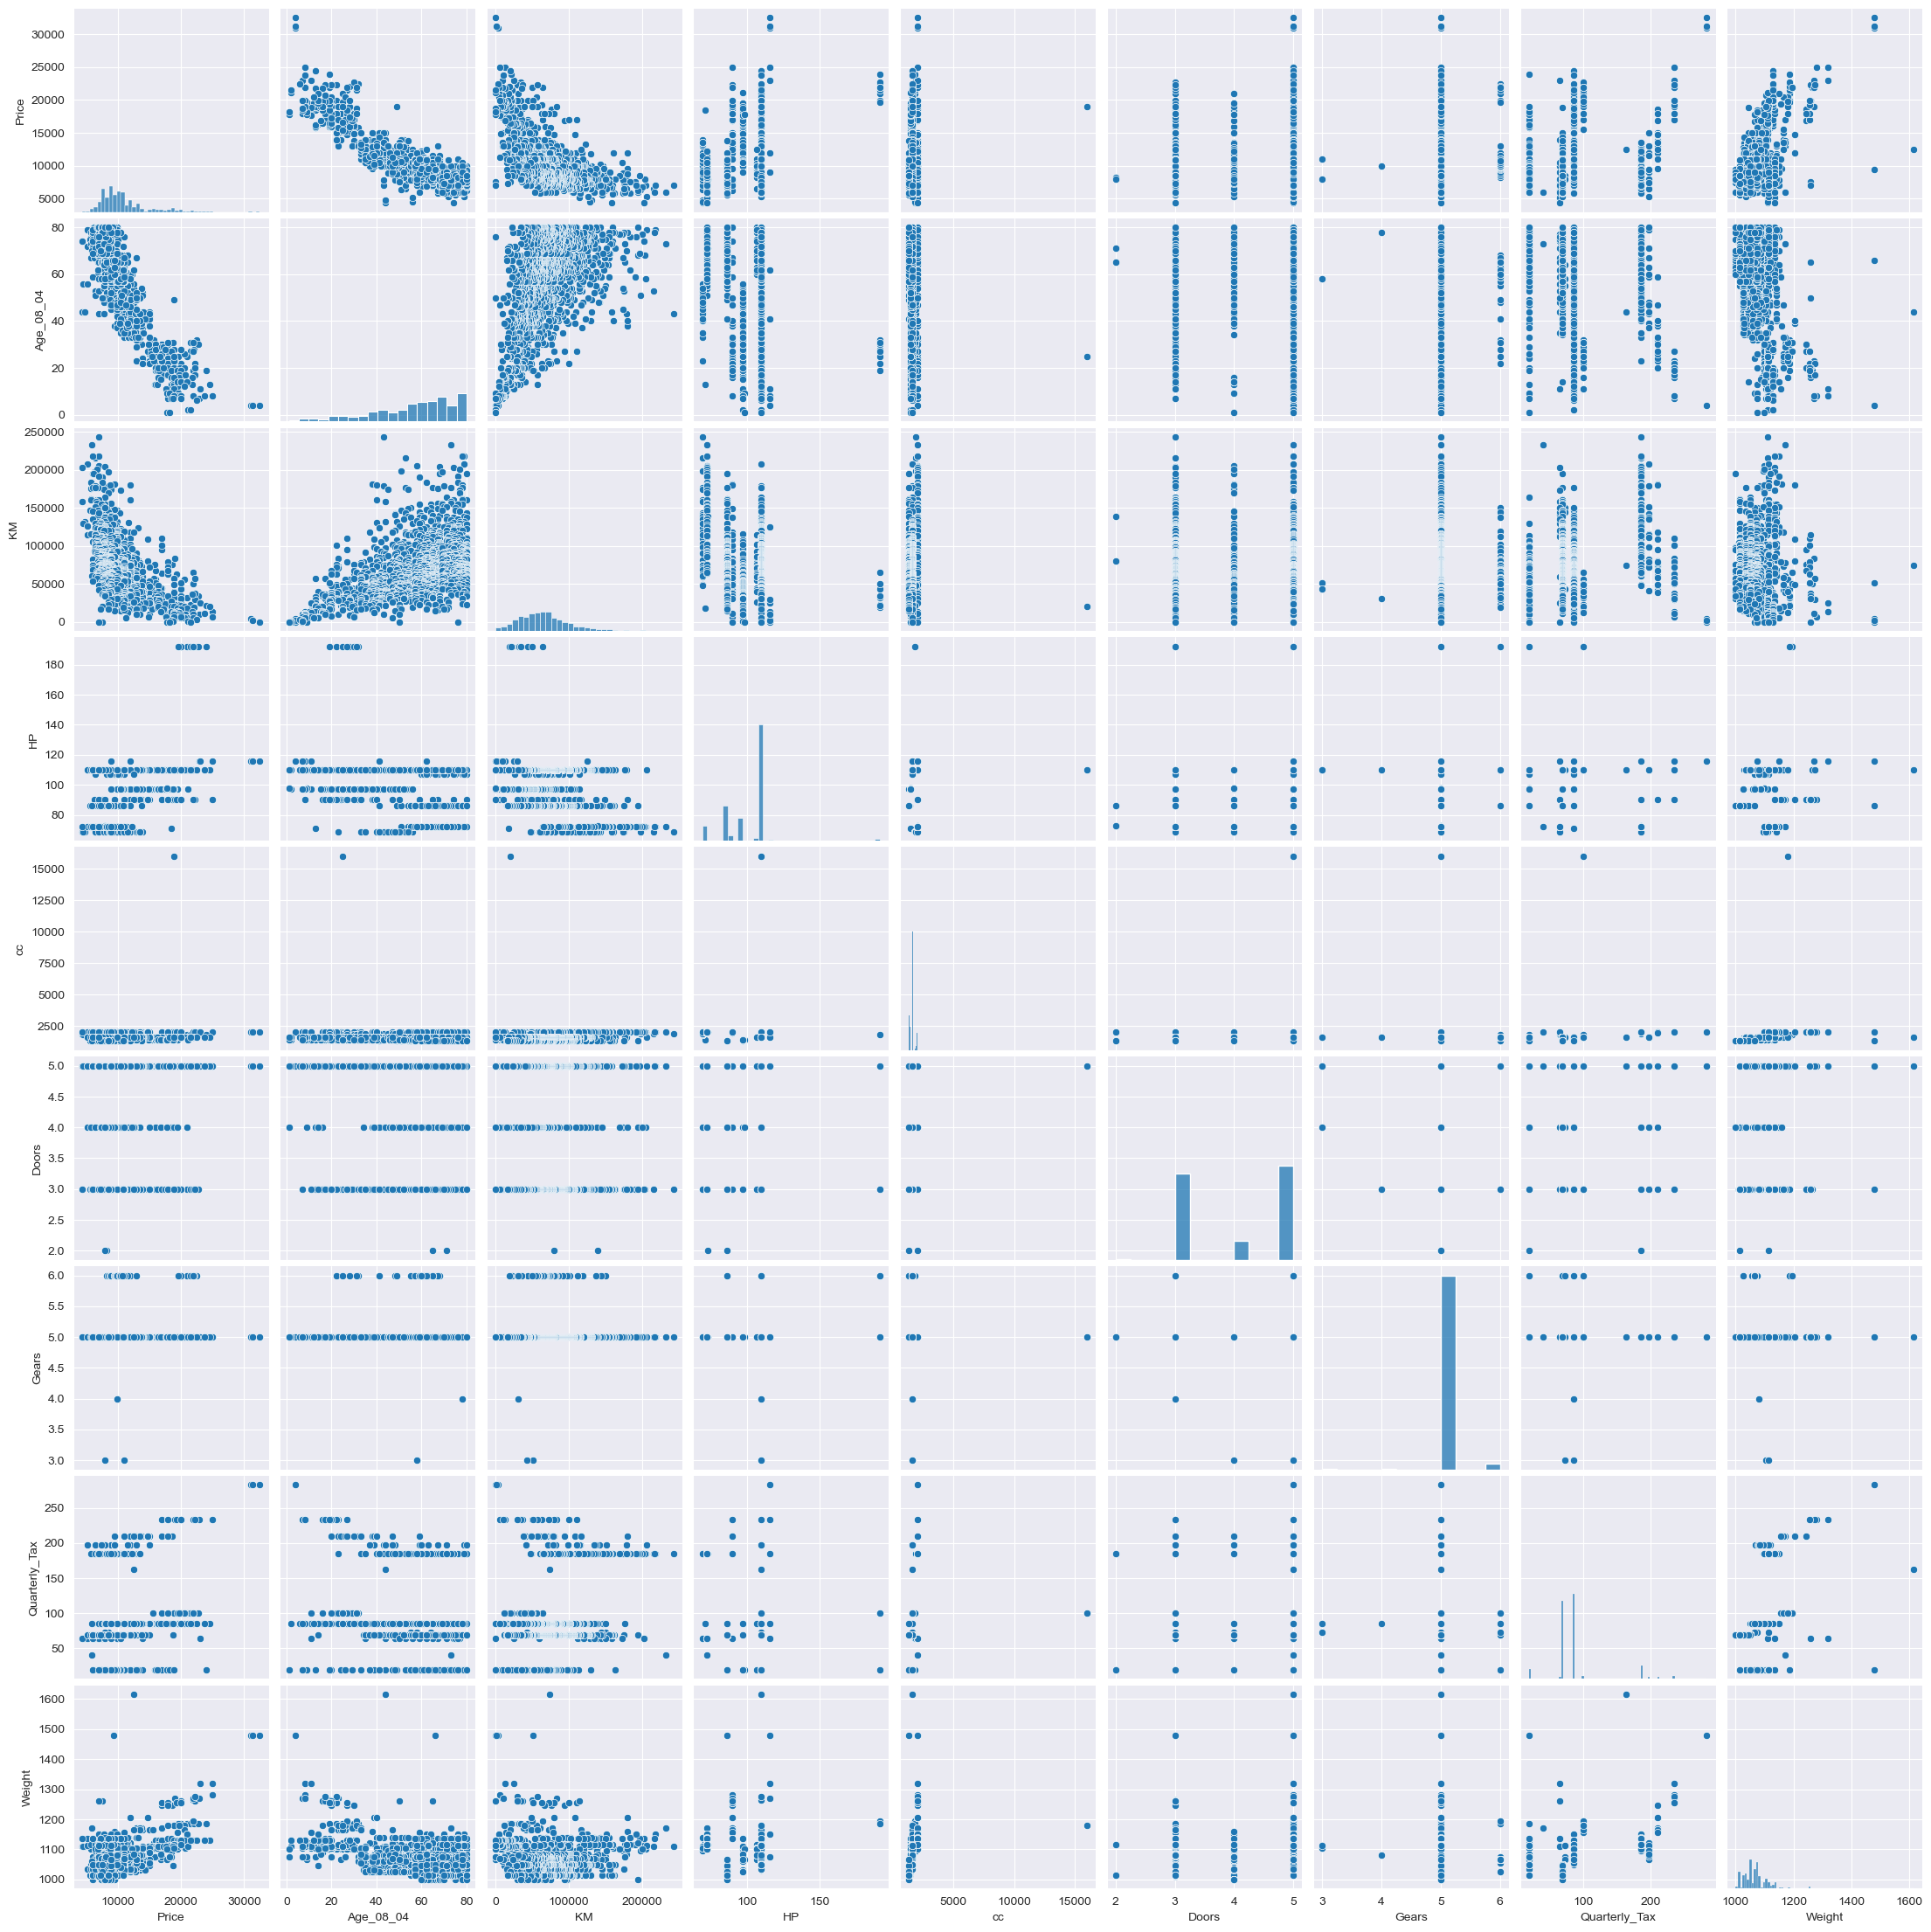

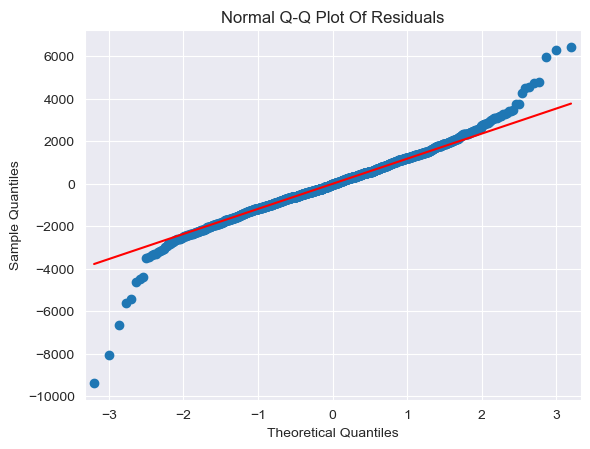

In [51]:
toyota_qqplot = sm.qqplot(toyota_model.resid , line= "q")
plt.title("Normal Q-Q Plot Of Residuals")
plt.show();

In [52]:
print(list(np.where(toyota_model.resid>4000)))
print(list(np.where(toyota_model.resid<-4000)))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]
[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]


In [53]:
def get_standardized_values( vals) : 
    return(vals - vals.mean()) / vals.std()

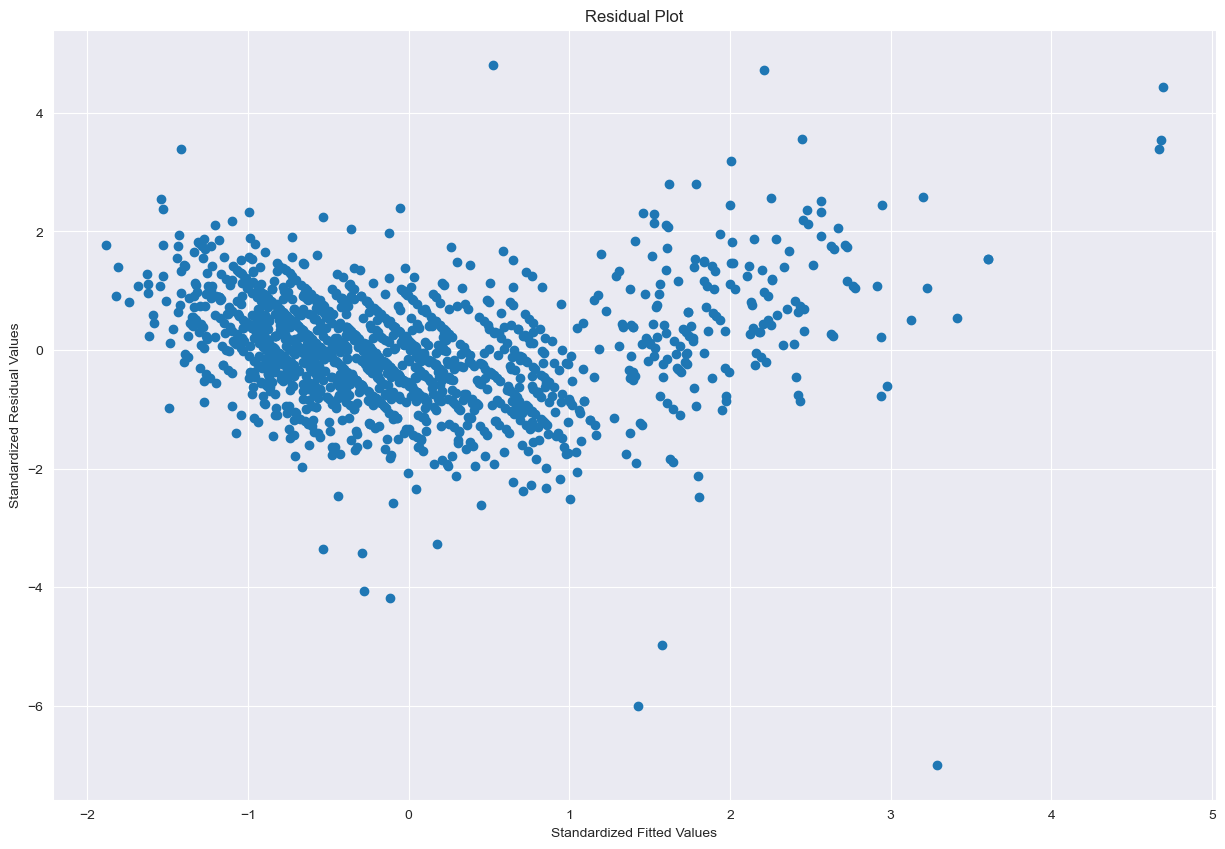

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(toyota_model.fittedvalues) , 
               get_standardized_values(toyota_model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

In [55]:
toyota_model_influence = toyota_model.get_influence()
(c, _) = toyota_model_influence.cooks_distance

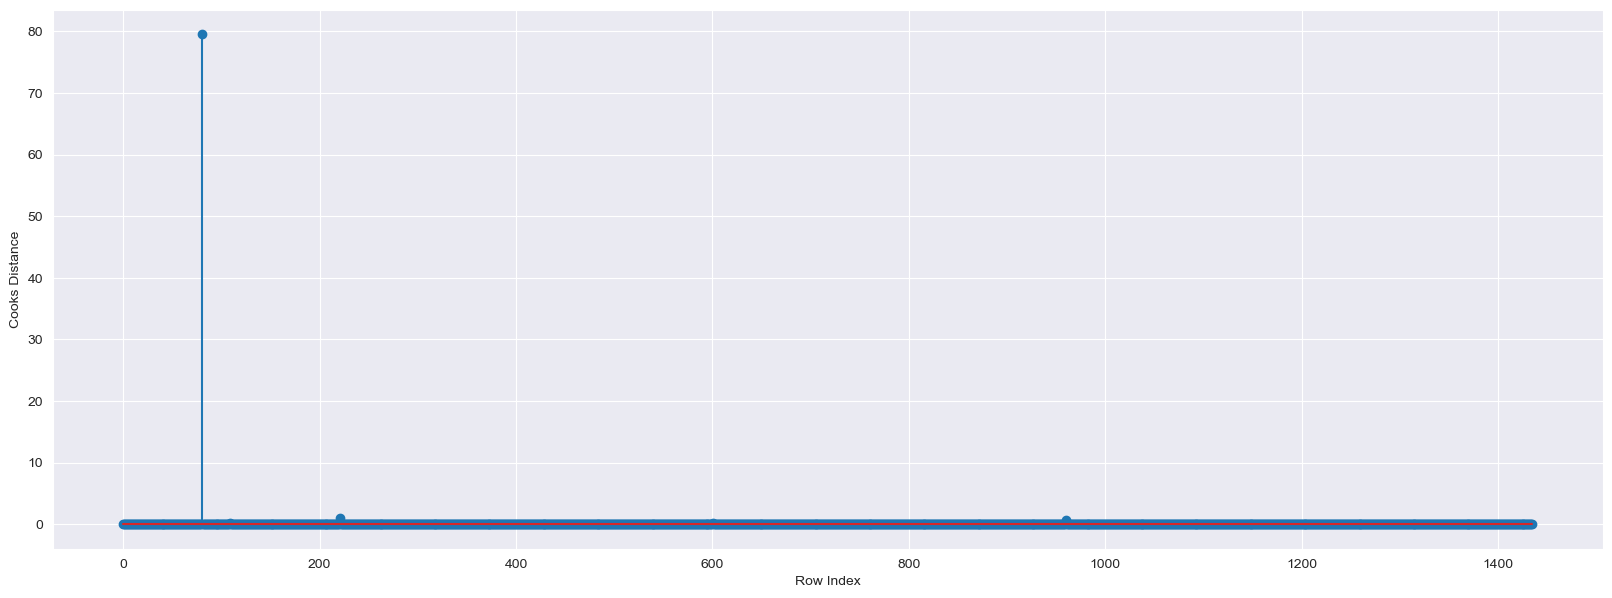

In [56]:
toyota_fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(toyota1)) , np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [57]:
(np.argmax(c),np.max(c))

(80, 79.5201062414182)

In [58]:
k = toyota1.shape[1] 
n = toyota1.shape[0] 
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [59]:
toyota1[toyota1.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [60]:
toyota2 = toyota1.drop(toyota1.index[80] , axis = 0).reset_index()

In [61]:
final_model = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight" , data = toyota2).fit()

In [62]:
toyota_model_influence_new = final_model.get_influence()
(c_new, _) = toyota_model_influence_new.cooks_distance

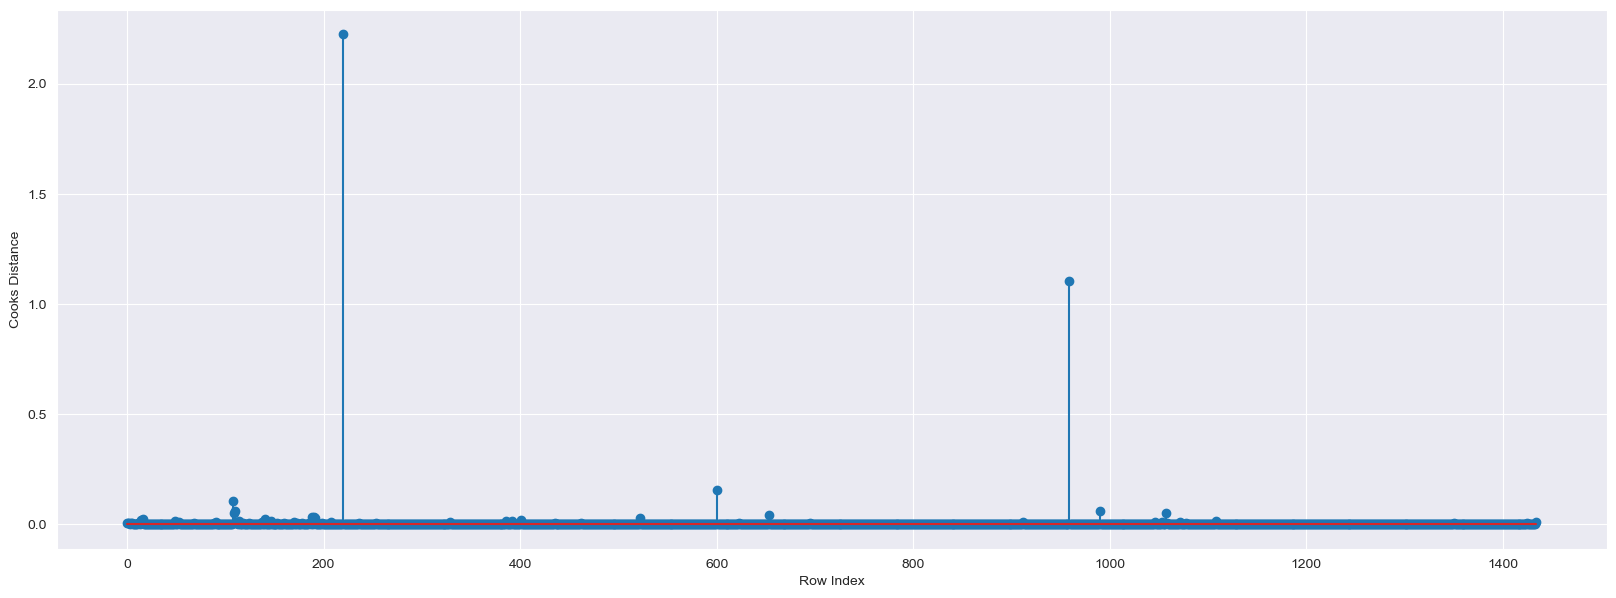

In [63]:
toyota1_fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(toyota2)) , np.round(c_new, 3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [64]:
(np.argmax(c_new),np.max(c_new))

(220, 2.224461171300723)

In [65]:
toyota3 = toyota2.drop(toyota2.index[220] , axis = 0).reset_index()

In [66]:
final_model1 = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight" , data = toyota3).fit()

In [67]:
toyota_model_influence_new1 = final_model1.get_influence()
(c_new1, _) = toyota_model_influence_new1.cooks_distance

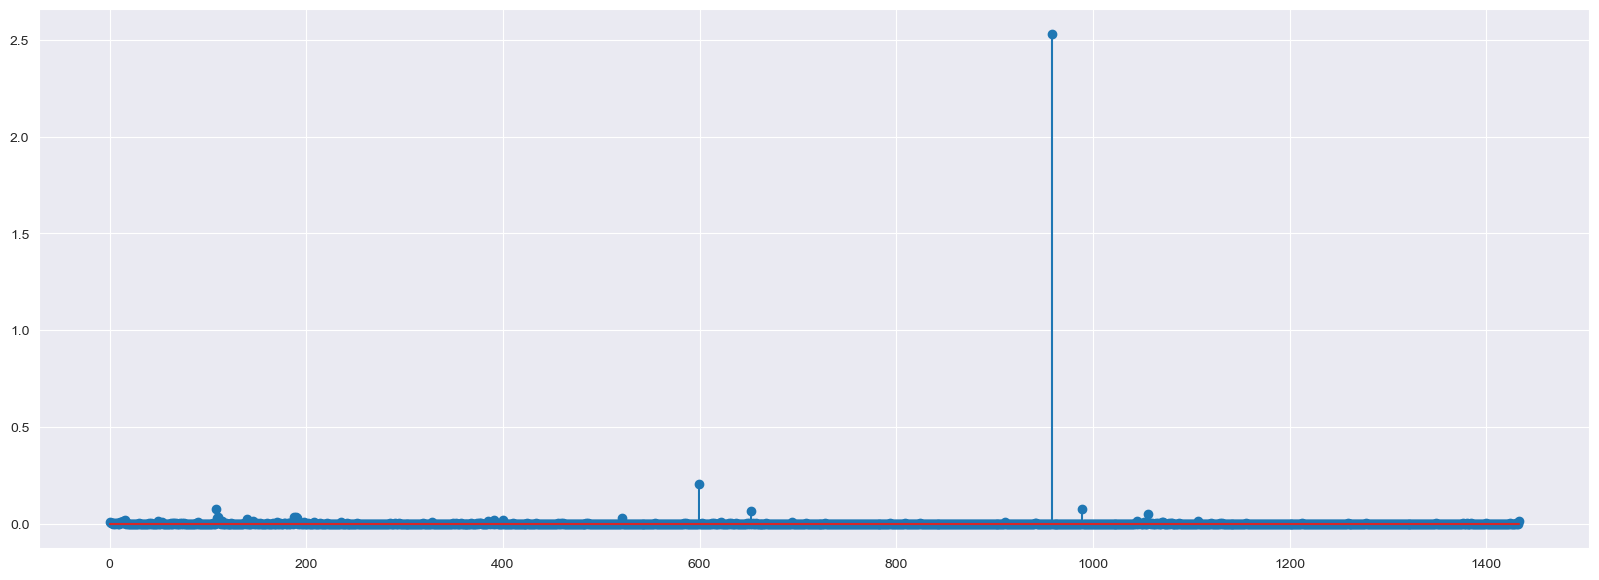

In [68]:
toyota2_fig = plt.subplots(figsize = (20 , 7))
plt.stem(np.arange(len(toyota3)) , np.round(c_new1 , 3))
plt.show()

In [69]:
(np.argmax(c_new1),np.max(c_new1))

(958, 2.5312566930232503)

In [70]:
toyota4 = toyota3.drop(toyota3.index[[958]] , axis = 0).reset_index(drop = True)

In [71]:
final_model2 = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight" , data = toyota4).fit()


In [72]:
toyota_model_influence_new2 = final_model2.get_influence()
(c_new2, _) = toyota_model_influence_new2.cooks_distance

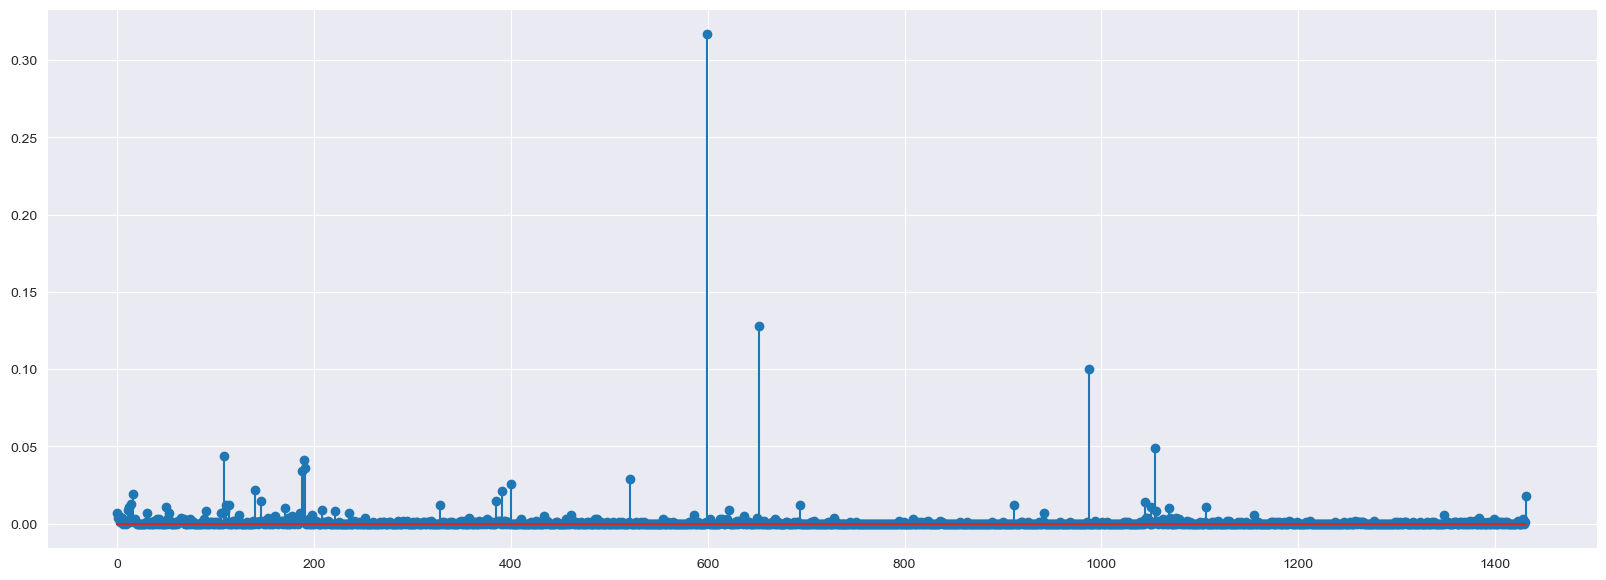

In [73]:
toyota3_fig = plt.subplots(figsize = (20 , 7))
plt.stem(np.arange(len(toyota4)) , np.round(c_new2 , 3))
plt.show()

In [74]:
toyota_fmodel = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight" , data = toyota4).fit()

In [75]:
(toyota_fmodel.rsquared,toyota_fmodel.aic)

(0.8851845904421739, 24469.715205158594)

In [76]:
new_data=pd.DataFrame({"Age_08_04" : 23 , "KM" : 46986 , "HP" : 90 , "cc" : 2000 , "Doors" : 3 , "Gears" : 5 , "Quarterly_Tax" : 210 , "Weight" : 1165},index=[0])

In [77]:
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165


In [78]:
toyota_fmodel.predict(new_data)

0    16333.273814
dtype: float64